In [1]:
import pandas as pd

/tmp/ipykernel_74165/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Parte 1

In [2]:
# Leggi i dati della Protezione Civile, usando la data come indice di time-series
data_full = pd.read_csv("./../data/dpc-covid19-ita-regioni.csv", index_col="data", parse_dates=True)
data_full.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filtra i dati della Valle d'Aosta
data_aosta_daily = data_full[data_full["denominazione_regione"] == "Valle d'Aosta"]
data_aosta_daily.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Calcola dei DataFrame riorganizzati per settimane e per mesi
data_aosta_weekly = data_aosta_daily.resample("W")
data_aosta_monthly = data_aosta_daily.resample("ME")

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta)"}, xlabel='data', ylabel='Numero contagi'>

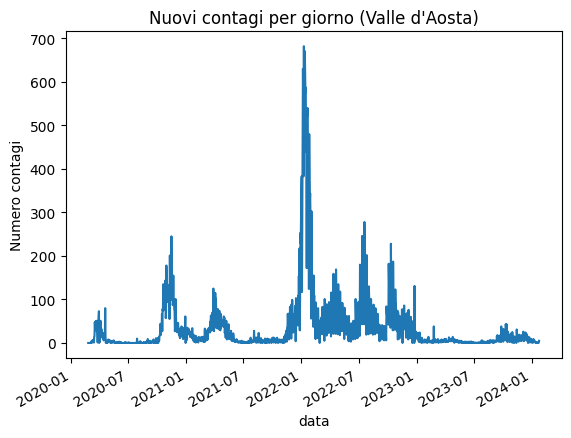

In [5]:
# Grafica il numero di contagi per giorno in Val d'Aosta
data_aosta_daily["nuovi_positivi"].plot(
    title="Nuovi contagi per giorno (Valle d'Aosta)",
    ylabel="Numero contagi",
)

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta, media settimanale)"}, xlabel='data', ylabel='Numero contagi'>

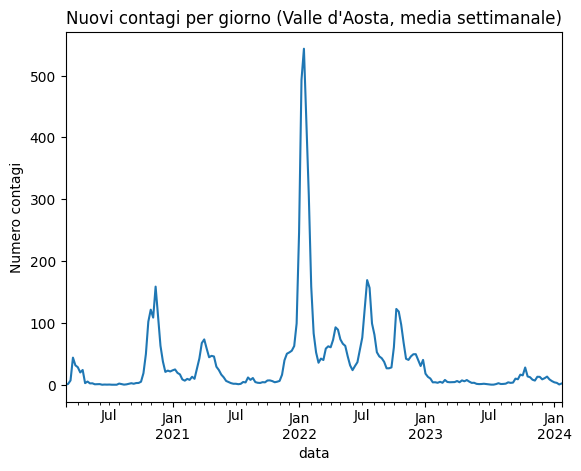

In [6]:
# I dati sono piuttosto rumorosi: conviene graficare la media settimanale
data_aosta_weekly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media settimanale)",
    ylabel="Numero contagi",
)

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta, media mensile)"}, xlabel='data', ylabel='Numero contagi'>

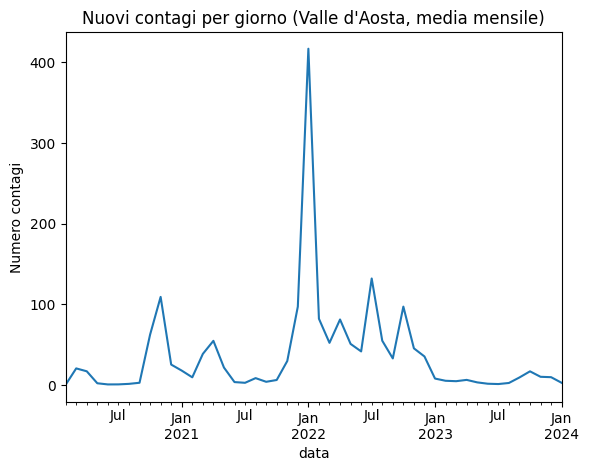

In [7]:
# La media mensile invece è troppo grezza
data_aosta_monthly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media mensile)",
    ylabel="Numero contagi",
)

# Parte 2

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from pandas import Timestamp, DatetimeIndex
from typing import Callable

In [9]:
def date_diff_to_int(t: Timestamp | DatetimeIndex, t_0: Timestamp):
    """
    Funzione di convenienza che trasforma date in un intero che denota la distanza in giorni
    Argomenti:
    t (Timestamp | DatetimeIndex): un Timestamp o un DatetimeIndex di pandas
    t_0 (Timestamp): il Timestamp rispetto al quale verrà calcolata la differenza
    Nota: la differenza non è assoluta ed è negativa se t < t_0
    """
    return (t - t_0).days


In [10]:
def logistic(t: float | Timestamp | DatetimeIndex, t_0: float | str | Timestamp, k: float, N_tot: int):
    """
    Calcola la funzione logisitica al tempo `t`
    Argomenti:
    t (float | Timestamp | DatetimeIndex): il tempo a cui calcolare la funzione. Può anche essere un
    Timestamp scalare o un DatetimeIndex di pandas. Nel caso di un DatetimeIndex, calcola la funzione per
    ogni valore dell'indice
    t_0 (float | str | Timestamp): il tempo d'inizio dell'evento. Se è la stringa "auto" e `t` è un array,
    si imposta automaticamente come il valore mediano dell'array (arrotondato per difetto)
    k (float): il tasso di propagazione
    N_tot (int): il numero totale di casi a fine evento
    """
    if t_0 == "auto" and hasattr(t, "__len__"):
        t_0 = t[len(t) // 2]
    if isinstance(t, (Timestamp, DatetimeIndex)) and isinstance(t_0, Timestamp):
        diff = date_diff_to_int(t, t_0)
    else:
        diff = t - t_0
    return N_tot / (1 + np.exp(-k * diff))

In [11]:
def gompertz(t: float, t_0: float, k: float, N_tot: int):
    """
    Calcola la funzione di Gompertz al tempo `t`
    Argomenti:
    t (float | Timestamp | DatetimeIndex): il tempo a cui calcolare la funzione. Può anche essere un
    Timestamp scalare o un DatetimeIndex di pandas. Nel caso di un DatetimeIndex, calcola la funzione per
    ogni valore dell'indice
    t_0 (float | Timestamp): il tempo d'inizio dell'evento
    k (float): il tasso di propagazione
    N_tot (int): il numero totale di casi a fine evento
    """
    if isinstance(t, (Timestamp, DatetimeIndex)) and isinstance(t_0, Timestamp):
        diff = date_diff_to_int(t, t_0)
    else:
        diff = t - t_0
    return N_tot * np.exp(-np.log(N_tot) * np.exp(-k * diff))

In [12]:
def contagi_giornalieri(func: Callable, day: int, **kwargs):
    """
    Conta i contagi giornalieri predetti dalla funzione `func` tra il giorno `day` e quello successivo
    Argomenti:
    func (Callable): La funzione da campionare
    day (int): Il giorno da considerare, come numero di giorni dall'inizio della pandemia
    kwargs: Gli argomenti aggiuntivi da passare alla funzione `func`
    """
    return abs(func(day + 1, **kwargs) - func(day, **kwargs))

In [13]:
x = np.linspace(-5, 15, 1000)

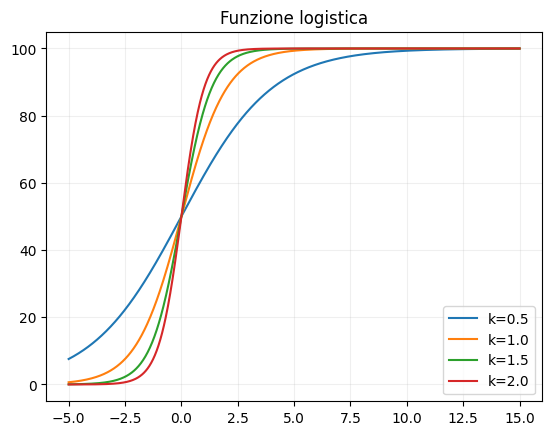

In [14]:
# Alcuni test per vedere se la funzione logistica è corretta
for k in [0.5, 1.0, 1.5, 2.0]:
    plt.plot(x, logistic(x, 0, k, 100), label=f"k={k}")
plt.legend(loc="lower right")
plt.title("Funzione logistica")
plt.grid(alpha=0.2)

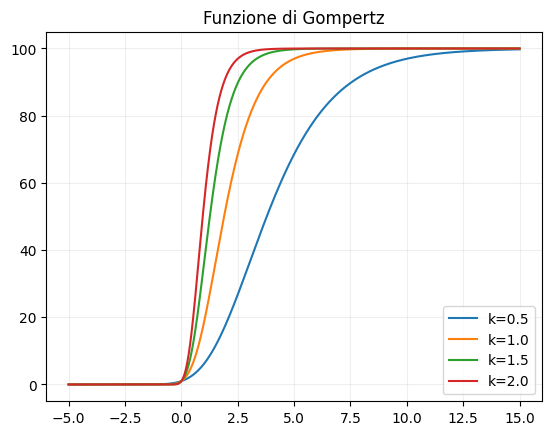

In [15]:
# Alcuni test per vedere se la funzione di Gompertz è corretta
for k in [0.5, 1.0, 1.5, 2.0]:
    plt.plot(x, gompertz(x, 0, k, 100), label=f"k={k}")
plt.legend(loc="lower right")
plt.title("Funzione di Gompertz")
plt.grid(alpha=0.2)


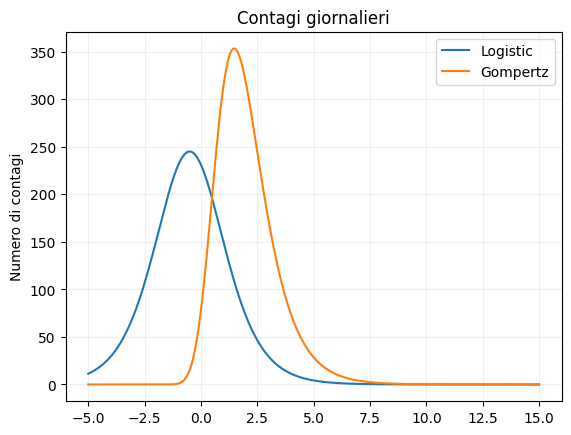

In [16]:
# Osserviamo la variazione giornaliera delle due funzioni (con k=1)
conts_l = contagi_giornalieri(logistic, x, k=1, N_tot=1000, t_0=0)
conts_g = contagi_giornalieri(gompertz, x, k=1, N_tot=1000, t_0=0)
plt.plot(x, conts_l, label="Logistic")
plt.plot(x, conts_g, label="Gompertz")
plt.title("Contagi giornalieri")
plt.ylabel("Numero di contagi")
plt.legend()
plt.grid(alpha=0.2)

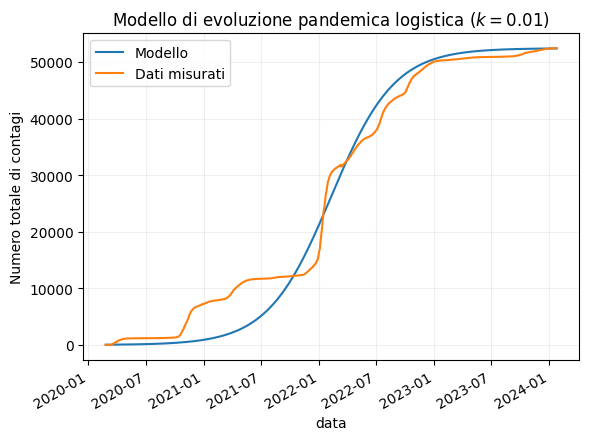

In [17]:
# Un primo tentativo completamente manuale al fittare la logistica ai dati misurati
d1 = data_aosta_daily.index
max_contagions = data_aosta_daily["totale_casi"].max()
plt.plot(d1, logistic(d1, "auto", 0.01, max_contagions), label="Modello")
data_aosta_daily["totale_casi"].plot(label="Dati misurati")
plt.title("Modello di evoluzione pandemica logistica ($k=0.01$)")
plt.ylabel("Numero totale di contagi")
plt.grid(alpha=0.2)
plt.legend()

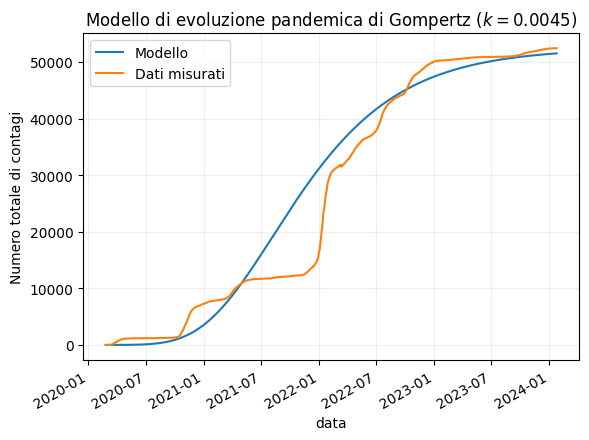

In [18]:
# Un primo tentativo completamente manuale al fittare la funzione di Gompertz ai dati misurati
d0 = data_aosta_daily.index[0]
d1 = data_aosta_daily.index
max_contagions = data_aosta_daily["totale_casi"].max()
plt.plot(d1, gompertz(d1, d0, 0.0045, max_contagions), label="Modello")
data_aosta_daily["totale_casi"].plot(label="Dati misurati")
plt.title("Modello di evoluzione pandemica di Gompertz ($k=0.0045$)")
plt.ylabel("Numero totale di contagi")
plt.grid(alpha=0.2)
plt.legend()

In [ ]:
# TODO: AGGIUNGERE MODELLO EVOLUZIONE CASI GIORNALIERI CON LOGISTICA E GOMPERTZ

# Parte 3

In [19]:
from scipy.stats import poisson
from scipy.optimize import minimize
import emcee
from math import factorial

In [20]:
# Filtriamo i dati per tenere solo quelli dei primi 35 giorni
data_aosta_daily_early = data_aosta_daily[data_aosta_daily.index <= Timestamp(year=2020, month=3, day=30)]
data_aosta_daily_early.shape

(35, 29)

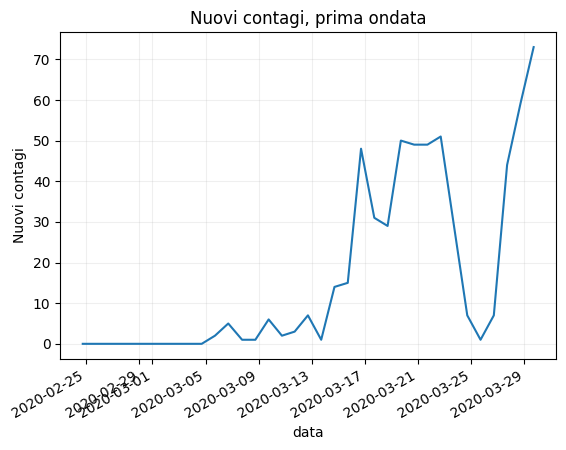

In [21]:
# Visualizziamo i dati per vedere su cosa stiamo lavorando
data_aosta_daily_early["nuovi_positivi"].plot(
    title="Nuovi contagi, prima ondata",
    ylabel="Nuovi contagi"
)
plt.grid(alpha=0.2)

In [65]:
# Definiamo la struttura statistica per effettuare la ricerca dei parametri del modello

# TODO: Rifare questo con funzioni logistica e di Gompertz

# Ipotizziamo una distribuzione poissoniana, quindi l'unico parametro che dobbiamo stimare
# è il numero di eventi che ci aspettiamo
def log_prior(expected_events: int):
    if expected_events < 0:
        return -np.inf
    return 0.0

def log_likelihood(expected_events: int, measured_cases: int):
    lam = expected_events
    k = measured_cases
    sums = [np.sum(np.log(np.arange(2, ki))) for ki in k]
    return np.sum(k*np.log(lam) - lam - sums)

def log_posterior(params: int, measured_cases: int):
    expected_events = params[0]
    prior = log_prior(expected_events)
    if not np.isfinite(prior):
        return -np.inf
    return prior + log_likelihood(expected_events, measured_cases)

In [66]:
# Impostiamo il seme RNG per rendere i calcoli riproducibili
np.random.seed(1234)

In [67]:
# Cerchiamo il minimo della funzione posterior per aiutare l'algoritmo emcee
start_point = 50
min_result = minimize(lambda *args: -log_posterior(*args), start_point, args=(data_aosta_daily_early["nuovi_positivi"], ))
min_events = min_result.x[0]
min_events

/run/media/dawnstar/vault/vault-home/Software/Python/analisi-covid-trmd/venv/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


16.68571349474575

In [68]:
sampler = emcee.EnsembleSampler(32, 1, log_posterior, args=(data_aosta_daily_early["nuovi_positivi"], ))
sampler.run_mcmc(min_events + 1e-2 * np.random.rand(32, 1), 2000, progress=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:18<00:00, 106.35it/s]


State([[17.29226189]
 [17.86797367]
 [16.11885815]
 [16.97423606]
 [16.12214691]
 [17.11473215]
 [17.22563154]
 [17.63165502]
 [16.34801002]
 [17.17009378]
 [16.63183205]
 [16.15084189]
 [16.661614  ]
 [16.44244759]
 [17.9512546 ]
 [17.46352748]
 [16.54347524]
 [15.30717225]
 [17.0650529 ]
 [16.29219202]
 [16.83829204]
 [15.27691036]
 [17.29813187]
 [15.75672985]
 [16.27440721]
 [17.02027678]
 [15.53654821]
 [18.80219973]
 [16.69000805]
 [17.49591585]
 [16.36890929]
 [16.63705917]], log_prob=[-479.41724221 -480.44067677 -479.38533091 -479.12680501 -479.38129507
 -479.23028347 -479.33978874 -479.94493662 -479.16173976 -479.28190382
 -479.04354287 -479.34711173 -479.04110107 -479.10316794 -480.6398645
 -479.65595493 -479.06183197 -481.15067417 -479.18916243 -479.20550817
 -479.06475955 -481.24720395 -479.42448224 -479.98068353 -479.2208915
 -479.1563398  -480.49258946 -483.37564791 -479.04051065 -479.70744748
 -479.14710635 -479.042979  ], blobs=None, random_state=('MT19937', array([2298

Text(0, 0.5, '$\\lambda$')

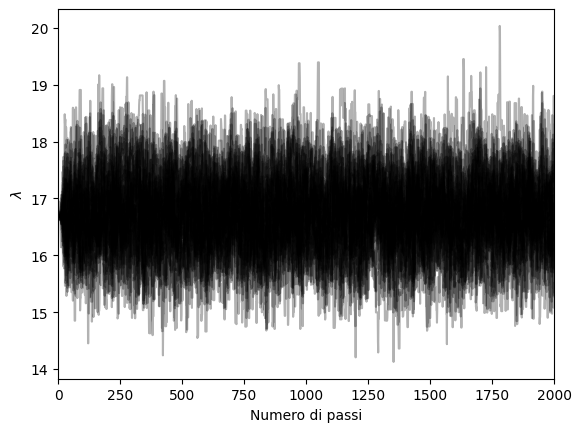

In [85]:
samples = sampler.get_chain()
samples = samples.reshape(2000, 32)
plt.plot(samples, "k", alpha=0.3)
plt.xlim(0, len(samples))
plt.xlabel("Numero di passi")
plt.ylabel("$\lambda$")

In [96]:
est_lambda = sampler.get_autocorr_time()[0]
est_lambda

22.596447520936028

In [97]:
flat_samples = sampler.get_chain(discard=100, flat=True).flatten()
flat_samples.shape

(60800,)

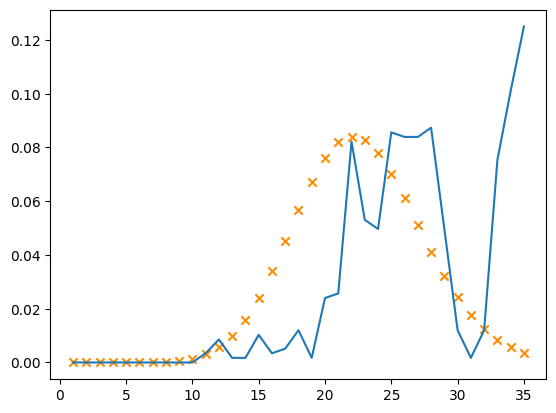

In [119]:
est_poisson = poisson(est_lambda)
t = np.arange(1, 36)
plt.scatter(t, est_poisson.pmf(t), marker="x", color="darkorange")
norm_nuovi_positivi = data_aosta_daily_early["nuovi_positivi"] / np.sum(data_aosta_daily_early["nuovi_positivi"])
plt.plot(t, norm_nuovi_positivi)
plt.title("Modello poissoniano")